In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [2]:
def take_step(state, action, states):
  if action == 1:
      new_state = 0
      if state == 0:
        reward = 0.2
      else:
        reward = 0
  else:
    if state == states[-1]:
      new_state = state
      reward = 1
    else:
      new_state = state+1
      reward = 0
  return new_state, reward

In [3]:
def q_learn(params, e_params):

    states = list(range(params['STATES']))
    epsilon = e_params['INITIAL_EPSILON']
    epsilon_decay_value = epsilon/(e_params['END_DECAYING_EPISODE'] - e_params['START_DECAYING_EPISODE'])

    aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

    # q_table = np.random.uniform(low=-2, high=0, size=(n_states, n_actions))
    q_table = np.zeros((params['STATES'], 2))

    for episode in range(params['EPISODES']+1):
        ep_rewards = []
        state = 0

        for step in range(params['STEPS']):

            if np.random.random() > epsilon:
                # Get action from Q table
                action = np.argmax(q_table[state,:])
            else:
                # Get random action
                action = np.random.randint(2)

            new_state, reward = take_step(state, action, states)
            ep_rewards.append(reward)

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_state,:])

            # Current Q value (for current state and performed action)
            current_q = q_table[state,action]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - params['LEARNING_RATE']) * current_q + params['LEARNING_RATE'] * (reward + params['DISCOUNT'] * max_future_q)

            # Update Q table with new Q value
            q_table[state,action] = new_q

            if episode % params['SHOW_TABLE_EVERY'] == 0 and step == params['STEPS']-1:
            # if episode % params['SHOW_TABLE_EVERY'] == 0 :
                print("At the end of episode #", episode, ":\n", q_table)

            state = new_state

        average_reward = sum(ep_rewards)/params['STEPS']
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards))
        aggr_ep_rewards['min'].append(min(ep_rewards))
        if not episode % params['STATS_EVERY']:
            print(f'Episode: {episode:>4d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

        # Decaying is being done every episode if episode number is within decaying range
        if e_params['END_DECAYING_EPISODE'] >= episode >= e_params['START_DECAYING_EPISODE']:
            epsilon -= epsilon_decay_value
    
    plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="episode average")
    plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="episode max")
    plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="episode min")
    plt.legend(loc=0)
    plt.xlabel("episodes")
    plt.ylabel("rewards")
    plt.show()
    return q_table

At the end of episode # 0 :
 [[1.47282905 1.86740335]
 [1.41915722 1.64841996]
 [1.50222343 1.61597709]
 [1.85480029 1.48206992]
 [2.4542107  1.53105919]]
Episode:    0, average reward:  0.1, current epsilon: 1.00
Episode:   50, average reward:  0.1, current epsilon: 0.93
At the end of episode # 100 :
 [[ 6.561   6.1049]
 [ 7.29    5.9049]
 [ 8.1     5.9049]
 [ 9.      5.9049]
 [10.      5.9049]]
Episode:  100, average reward:  0.1, current epsilon: 0.85
Episode:  150, average reward:  0.1, current epsilon: 0.78
At the end of episode # 200 :
 [[ 6.561   6.1049]
 [ 7.29    5.9049]
 [ 8.1     5.9049]
 [ 9.      5.9049]
 [10.      5.9049]]
Episode:  200, average reward:  0.1, current epsilon: 0.70
Episode:  250, average reward:  0.2, current epsilon: 0.63
At the end of episode # 300 :
 [[ 6.561   6.1049]
 [ 7.29    5.9049]
 [ 8.1     5.9049]
 [ 9.      5.9049]
 [10.      5.9049]]
Episode:  300, average reward:  0.2, current epsilon: 0.55
Episode:  350, average reward:  0.3, current epsilo

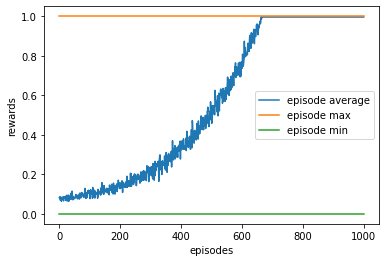

In [ ]:
params = {
    'STATES': 5,
    'LEARNING_RATE' : 0.1,
    'DISCOUNT' : 0.9,
    'EPISODES' : 1000,
    'STEPS' : 1000,
    'SHOW_TABLE_EVERY' : 100,
    'STATS_EVERY' : 50,
}

e_params = {
    # Exploration settings
    'INITIAL_EPSILON' : 1,  # not a constant, qoing to be decayed
    'START_DECAYING_EPISODE' : 1,
    'END_DECAYING_EPISODE' : params['EPISODES']//1.5
}

q_table = q_learn(params, e_params)

At the end of episode # 0 :
 [[1.4679591  1.87764715]
 [1.42530278 1.65585195]
 [1.05390068 1.62095093]
 [0.57953046 1.38682465]
 [0.21946245 1.06476325]
 [0.24381719 0.57648453]
 [0.03417049 0.67110022]
 [0.         0.26715644]
 [0.         0.15683394]
 [0.         0.        ]]
Episode:    0, average reward:  0.1, current epsilon: 1.00
Episode:   25, average reward:  0.1, current epsilon: 0.95
At the end of episode # 50 :
 [[1.62       2.        ]
 [1.62       1.8       ]
 [1.62       1.8       ]
 [1.62       1.8       ]
 [1.62       1.8       ]
 [1.61999997 1.8       ]
 [1.61924872 1.79999999]
 [1.60517574 1.799697  ]
 [2.12243821 1.66851629]
 [2.97230971 1.7733884 ]]
Episode:   50, average reward:  0.1, current epsilon: 0.90
Episode:   75, average reward:  0.1, current epsilon: 0.85
At the end of episode # 100 :
 [[1.93392487 2.        ]
 [2.15489035 1.8       ]
 [2.40324492 1.8       ]
 [2.68754832 1.8       ]
 [3.01848951 1.8       ]
 [3.4055693  1.8       ]
 [3.87488588 1.8      

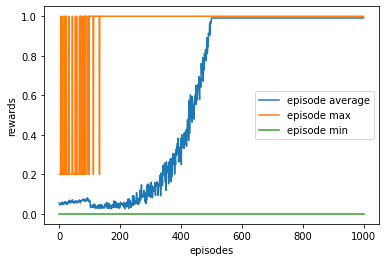

In [7]:
params = {
    'STATES': 10,
    'LEARNING_RATE' : 0.1,
    'DISCOUNT' : 0.9,
    'EPISODES' : 1000,
    'STEPS' : 1000,
    'SHOW_TABLE_EVERY' : 50,
    'STATS_EVERY' : 25,
}

e_params = {
    # Exploration settings
    'INITIAL_EPSILON' : 1,  # not a constant, qoing to be decayed
    'START_DECAYING_EPISODE' : 1,
    'END_DECAYING_EPISODE' : params['EPISODES']//2
}

q_table = q_learn(params, e_params)

# Part 2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F
import random

In [ ]:
def render_q_table(model, states):
  """Prints Q table"""
  with torch.no_grad():
    for state in states:
      state_vector = F.one_hot(torch.tensor([state]), num_classes=len(states)).type(torch.FloatTensor)
      print(model(state_vector))

In [ ]:
# class DQN(nn.Module):
#   def __init__(self, states, num_actions=2):
#     super(DQN, self).__init__()
#     self.fc1 = nn.Linear(states, 5)
#     self.fc2 = nn.Linear(5, 2)
#     self.relu = nn.ReLU()
  
#   def forward(self, x):
#     x = self.fc1(x)
#     x = self.relu(x)
#     x = self.fc2(x)
#     return x

# class DQN_target(nn.Module):
#   def __init__(self, states, num_actions=2):
#     super(DQN_target, self).__init__()
#     self.fc1 = nn.Linear(states, 5)
#     self.fc2 = nn.Linear(5, 2)
#     self.relu = nn.ReLU()
  
#   def forward(self, x):
#     x = self.fc1(x)
#     x = self.relu(x)
#     x = self.fc2(x)
#     return x

In [ ]:
class DQN(nn.Module):
  """Base model that is trained continously"""
  def __init__(self, states, num_actions=2):
    super(DQN, self).__init__()
    self.fc1 = nn.Linear(states, 2)
  
  def forward(self, x):
    x = self.fc1(x)
    return x

class DQN_target(nn.Module):
  """Traget model that takes the weights of Base model for every target gradient update times"""
  def __init__(self, states, num_actions=2):
    super(DQN_target, self).__init__()
    self.fc1 = nn.Linear(states, 2)
  
  def forward(self, x):
    x = self.fc1(x)
    return x

In [ ]:
def train(model, state_vector, Y, actions, criterion, optimizer, BATCH_SIZE):
  """Training is done using target Q value (coming from target model)"""
  out = model(state_vector)
  loss = criterion(out[range(BATCH_SIZE),actions], Y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  return model

In [ ]:
def DQN_learn(params, e_params): #.popleft()

    replay_buffer = []
    aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []} # for aggregating statistics
    model = DQN(states=params['STATES']) # base model
    target_model = DQN_target(states=params['STATES']) # target model
    optimizer = optim.Adam(model.parameters(), params['LEARNING_RATE']) 
    criterion = nn.MSELoss()
    states = list(range(params['STATES'])) # list of possible states
    epsilon = e_params['INITIAL_EPSILON'] # initial value of epsilon
    # decay factor derived from given START_DECAYING_EPISODE and END_DECAYING_EPISODE:
    epsilon_decay_value = epsilon/(e_params['END_DECAYING_EPISODE'] - e_params['START_DECAYING_EPISODE']) 

    for episode in range(params['EPISODES']+1):
        ep_rewards = [] # to collect rewards obtained in the episode
        state = 0 # starting from state 0 (reset state)

        for step in range(params['STEPS']):

            # converting state (categorical variable) to one-hot encoded vector
            state_vector = F.one_hot(torch.tensor([state]), num_classes=params['STATES']).type(torch.FloatTensor)

            if np.random.random() > epsilon: # taking optimal action (got from q table) with epsilon probability
                action = torch.argmax(model(state_vector),1).item() 
            else:
                action = np.random.randint(2)

            new_state, reward = take_step(state, action, states)
            ep_rewards.append(reward)

            if len(replay_buffer) < params['REPLAY_MEMORY_SIZE']:
                replay_buffer.append([state, action, reward, new_state])
            elif len(replay_buffer) == params['REPLAY_MEMORY_SIZE']:
                del replay_buffer[0]
                replay_buffer.append([state, action, reward, new_state])

            if len(replay_buffer) == params['REPLAY_MEMORY_SIZE']:
                
                # state_s, action_s, reward_s, new_state_s
                sampled_transitions = np.array(random.sample(replay_buffer, params['BATCH_SIZE']))

                state_s = sampled_transitions[:,0]
                action_s = sampled_transitions[:,1]
                reward_s = sampled_transitions[:,2]
                new_state_s = sampled_transitions[:,3]

                state_vector_s = torch.zeros(params['BATCH_SIZE'], params['STATES'])
                state_vector_s[torch.arange(params['BATCH_SIZE']), state_s] = 1
                new_state_vector_s = torch.zeros(params['BATCH_SIZE'], params['STATES'])
                new_state_vector_s[torch.arange(params['BATCH_SIZE']), new_state_s] = 1
                reward_s = torch.tensor(reward_s)

                next_q, _ = torch.max(target_model(new_state_vector_s).detach(),1) # max q given new_state and approximator
                target_q = reward_s + params['DISCOUNT'] * next_q # r + gamma * max q
                target_q = target_q.type(torch.FloatTensor)
                model = train(model, state_vector_s, target_q, action_s, criterion, optimizer, params['BATCH_SIZE']) # training using target_q
                
                if not episode % params['GRAD_UPDATE_EVERY']:
                    target_model.load_state_dict(model.state_dict())

            if episode % params['SHOW_TABLE_EVERY'] == 0 and step == params['STEPS']-1:
                print("At the end of episode #", episode+1, ":")
                render_q_table(model, states)
                
            state = new_state

        average_reward = sum(ep_rewards)/params['STEPS']
        aggr_ep_rewards['ep'].append(episode+1)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards))
        aggr_ep_rewards['min'].append(min(ep_rewards))
        if not episode % params['STATS_EVERY']:
            print(f'Episode: {episode+1:>4d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

        # Decaying is being done every episode if episode number is within decaying range
        if e_params['END_DECAYING_EPISODE'] >= episode >= e_params['START_DECAYING_EPISODE']:
            epsilon -= epsilon_decay_value
    
    plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="episode max")
    plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="episode min")
    plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="episode average")
    plt.legend(loc=0)
    plt.xlabel("episodes")
    plt.ylabel("rewards")
    plt.show()

    return model

At the end of episode # 1 :
tensor([[0.5405, 0.0362]])
tensor([[-0.0035,  0.1352]])
tensor([[0.6255, 0.0796]])
tensor([[0.2651, 0.7085]])
tensor([[0.6187, 0.3020]])
Episode:    1, average reward:  0.1, current epsilon: 1.00
Episode:   51, average reward:  0.1, current epsilon: 0.80
At the end of episode # 101 :
tensor([[6.5610, 6.1049]])
tensor([[7.2900, 5.9049]])
tensor([[8.1000, 5.9049]])
tensor([[9.0000, 5.9049]])
tensor([[10.0000,  5.9049]])
Episode:  101, average reward:  0.1, current epsilon: 0.60
Episode:  151, average reward:  0.4, current epsilon: 0.40
At the end of episode # 201 :
tensor([[6.9059, 6.4761]])
tensor([[7.5507, 6.2644]])
tensor([[8.2142, 6.2795]])
tensor([[8.9099, 6.2863]])
tensor([[9.7681, 6.2653]])
Episode:  201, average reward:  0.6, current epsilon: 0.20
Episode:  251, average reward:  1.0, current epsilon: -0.00
At the end of episode # 301 :
tensor([[6.5610, 6.4154]])
tensor([[7.2900, 6.2154]])
tensor([[8.1000, 6.2154]])
tensor([[9.0000, 6.2154]])
tensor([[1

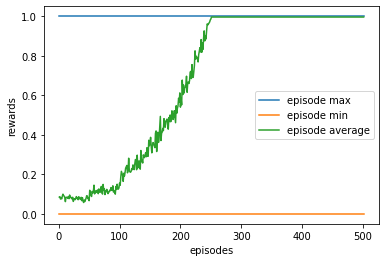

In [ ]:
params = {
    'STATES': 5,
    'LEARNING_RATE' : 0.05,
    'DISCOUNT' : 0.9,
    'EPISODES' : 500,
    'STEPS' : 1000,
    'SHOW_TABLE_EVERY' : 100,
    'STATS_EVERY' : 50,
    'GRAD_UPDATE_EVERY': 100,
    'REPLAY_MEMORY_SIZE': 50000,
    'BATCH_SIZE': 10
}

e_params = {
    # Exploration settings
    'INITIAL_EPSILON' : 1,  # not a constant, qoing to be decayed
    'START_DECAYING_EPISODE' : 1,
    'END_DECAYING_EPISODE' : params['EPISODES']//2
}

model = DQN_learn(params, e_params)

At the end of episode # 1 :
tensor([[ 0.0090, -0.3234]])
tensor([[0.4425, 0.1639]])
tensor([[0.2910, 0.1995]])
tensor([[0.1593, 0.1614]])
tensor([[ 0.0800, -0.1457]])
tensor([[ 0.5838, -0.0105]])
tensor([[-0.0079,  0.1255]])
tensor([[ 0.4650, -0.2811]])
tensor([[ 0.4660, -0.2597]])
tensor([[-0.0266, -0.1543]])
Episode:    1, average reward:  0.0, current epsilon: 1.00
Episode:   51, average reward:  0.1, current epsilon: 0.80
At the end of episode # 101 :
tensor([[1.6213, 2.0008]])
tensor([[1.6237, 1.8010]])
tensor([[1.6223, 1.8019]])
tensor([[1.6568, 1.8027]])
tensor([[1.8413, 1.8015]])
tensor([[2.0503, 1.8017]])
tensor([[2.2804, 1.8004]])
tensor([[2.5883, 1.7602]])
tensor([[2.8586, 2.0787]])
tensor([[7.2021, 1.4267]])
Episode:  101, average reward:  0.1, current epsilon: 0.60
Episode:  151, average reward:  0.1, current epsilon: 0.40
At the end of episode # 201 :
tensor([[3.2040, 3.1074]])
tensor([[3.5413, 3.0110]])
tensor([[3.9316, 3.0000]])
tensor([[4.3711, 2.8025]])
tensor([[5.192

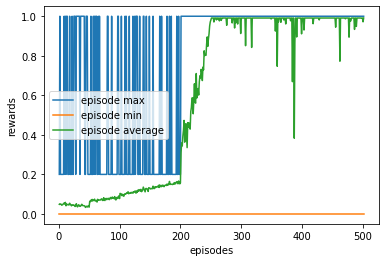

In [ ]:
params = {
    'STATES': 10,
    'LEARNING_RATE' : 0.05,
    'DISCOUNT' : 0.9,
    'EPISODES' : 500,
    'STEPS' : 1000,
    'SHOW_TABLE_EVERY' : 100,
    'STATS_EVERY' : 50,
    'GRAD_UPDATE_EVERY': 100,
    'REPLAY_MEMORY_SIZE': 50000,
    'BATCH_SIZE': 10
}

e_params = {
    # Exploration settings
    'INITIAL_EPSILON' : 1,  # not a constant, qoing to be decayed
    'START_DECAYING_EPISODE' : 1,
    'END_DECAYING_EPISODE' : params['EPISODES']//2
}

model = DQN_learn(params, e_params)

# Additional experiments

At the end of episode # 0 :
 [[1.60668956 1.99120906]
 [1.37922254 1.78835821]
 [0.14671848 1.70499255]
 [0.57245215 0.19815707]
 [1.57056807 0.82455884]]
Episode:    0, average reward:  0.1, current epsilon: 0.50
Episode:   50, average reward:  0.3, current epsilon: 0.46
Episode:  100, average reward:  0.3, current epsilon: 0.43
Episode:  150, average reward:  0.3, current epsilon: 0.39
Episode:  200, average reward:  0.4, current epsilon: 0.35
Episode:  250, average reward:  0.4, current epsilon: 0.31
Episode:  300, average reward:  0.5, current epsilon: 0.28
Episode:  350, average reward:  0.5, current epsilon: 0.24
Episode:  400, average reward:  0.6, current epsilon: 0.20
Episode:  450, average reward:  0.6, current epsilon: 0.16
At the end of episode # 500 :
 [[ 6.561   6.1049]
 [ 7.29    5.9049]
 [ 8.1     5.9049]
 [ 9.      5.9049]
 [10.      5.9049]]
Episode:  500, average reward:  0.7, current epsilon: 0.12
Episode:  550, average reward:  0.8, current epsilon: 0.09
Episode:  

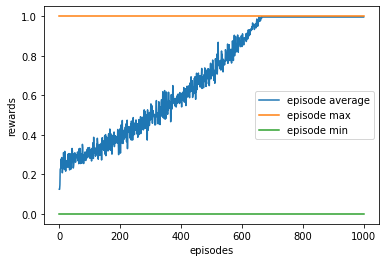

In [11]:
params = {
    'STATES': 5,
    'LEARNING_RATE' : 0.1,
    'DISCOUNT' : 0.9,
    'EPISODES' : 1000,
    'STEPS' : 1000,
    'SHOW_TABLE_EVERY' : 500,
    'STATS_EVERY' : 50,
}

e_params = {
    # Exploration settings
    'INITIAL_EPSILON' : 0.5,  # not a constant, qoing to be decayed
    'START_DECAYING_EPISODE' : 1,
    'END_DECAYING_EPISODE' : params['EPISODES']//1.5
}

q_table = q_learn(params, e_params)

At the end of episode # 0 :
 [[1.41432385 1.81525567]
 [1.27508223 1.59582472]
 [1.23894402 1.52066948]
 [1.68230894 1.3905013 ]
 [2.77289904 1.27086551]]
Episode:    0, average reward:  0.1, current epsilon: 1.00
Episode:   50, average reward:  0.1, current epsilon: 0.88
Episode:  100, average reward:  0.1, current epsilon: 0.75
Episode:  150, average reward:  0.2, current epsilon: 0.63
Episode:  200, average reward:  0.3, current epsilon: 0.50
Episode:  250, average reward:  0.4, current epsilon: 0.38
Episode:  300, average reward:  0.5, current epsilon: 0.25
Episode:  350, average reward:  0.7, current epsilon: 0.13
Episode:  400, average reward:  1.0, current epsilon: 0.00
Episode:  450, average reward:  1.0, current epsilon: -0.00
At the end of episode # 500 :
 [[ 6.561   6.1049]
 [ 7.29    5.9049]
 [ 8.1     5.9049]
 [ 9.      5.9049]
 [10.      5.9049]]
Episode:  500, average reward:  1.0, current epsilon: -0.00
Episode:  550, average reward:  1.0, current epsilon: -0.00
Episode

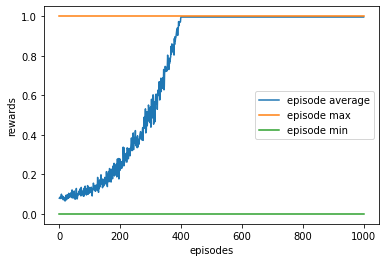

In [12]:
params = {
    'STATES': 5,
    'LEARNING_RATE' : 0.1,
    'DISCOUNT' : 0.9,
    'EPISODES' : 1000,
    'STEPS' : 1000,
    'SHOW_TABLE_EVERY' : 500,
    'STATS_EVERY' : 50,
}

e_params = {
    # Exploration settings
    'INITIAL_EPSILON' : 1,  # not a constant, qoing to be decayed
    'START_DECAYING_EPISODE' : 1,
    'END_DECAYING_EPISODE' : params['EPISODES']//2.5
}

q_table = q_learn(params, e_params)

At the end of episode # 0 :
 [[1.44624691 1.81710311]
 [1.35507328 1.61642637]
 [1.15163547 1.57074616]
 [1.31222288 1.46190097]
 [1.90272132 1.20815236]]
Episode:    0, average reward:  0.1, current epsilon: 1.00
Episode:   50, average reward:  0.1, current epsilon: 0.98
Episode:  100, average reward:  0.1, current epsilon: 0.95
Episode:  150, average reward:  0.1, current epsilon: 0.93
Episode:  200, average reward:  0.1, current epsilon: 0.90
Episode:  250, average reward:  0.1, current epsilon: 0.88
Episode:  300, average reward:  0.1, current epsilon: 0.85
Episode:  350, average reward:  0.1, current epsilon: 0.83
Episode:  400, average reward:  0.1, current epsilon: 0.80
Episode:  450, average reward:  0.1, current epsilon: 0.78
At the end of episode # 500 :
 [[ 6.561   6.1049]
 [ 7.29    5.9049]
 [ 8.1     5.9049]
 [ 9.      5.9049]
 [10.      5.9049]]
Episode:  500, average reward:  0.1, current epsilon: 0.75
Episode:  550, average reward:  0.1, current epsilon: 0.73
Episode:  

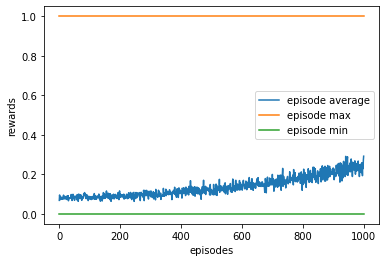

In [13]:
params = {
    'STATES': 5,
    'LEARNING_RATE' : 0.1,
    'DISCOUNT' : 0.9,
    'EPISODES' : 1000,
    'STEPS' : 1000,
    'SHOW_TABLE_EVERY' : 500,
    'STATS_EVERY' : 50,
}

e_params = {
    # Exploration settings
    'INITIAL_EPSILON' : 1,  # not a constant, qoing to be decayed
    'START_DECAYING_EPISODE' : 1,
    'END_DECAYING_EPISODE' : params['EPISODES']//0.5
}

q_table = q_learn(params, e_params)